# Exploration: Linear Regression and Classification


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

## Section 1: Guided Exploration

For the first part of this workshop, you will step into the role of a data scientist examining some raw biological statistics. The dataset provided is in the `mammals.csv` file, which documents the body weight (in kilograms) and the brain weight (in grams) of 62 mammals.  (Source: Rogel-Salazar, Jesus (2015): Mammals Dataset. figshare. Dataset. https://doi.org/10.6084/m9.figshare.1565651.v1. Drawn from Allison, T. and Cicchetti, D. V. (1976). Sleep in mammals: ecological and constitutional correlates. *Science, 194*, 732–734.)

Specifically, your task is to evaluate the relationship between mammalian body weight and brain weight. Even without domain expertise, it seems logical that some relationship should exist (afterall, it seems safe to assume that larger animals would have proporitionally larger brains). But what is the exact relationship? Any strong is that relationship. Determining those details is useful in fields such as evolutionary biology and doing so will be your job today.



In [2]:
mammals = pd.read_csv('Data/mammals.csv')
mammals.head()

,Mammal,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5


### Plot the Data

Often the best way to get a sense of your data is to do so visually. Because you have to numerical features, a scatter plot would be most appropriate for this dataset. Pandas DataFrames have [two](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) [methods](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html) that can be used to create scatter plots.

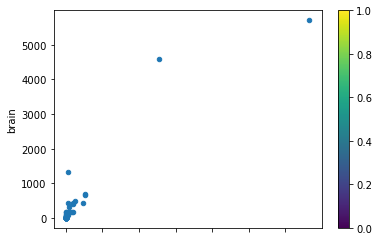

In [16]:
mammals.plot.scatter(x='body', y='brain', cmap=('rainbow'))

Don't worry: your scatter plot should be hard to read. Most of the values are clustered at the tiny end with two very large mammals in particular (the Asian and African elephants) skewing the scale.

### Transform Your Data

Because of the decidedly non-linear dispersion of mammalian size, you will need to transform you data in order to more clearly see the relationships in it.

**Group or Partner Discussion**

 - Which feature in the dataset should you transform? Should you transform both? In either case, why? What do you predict you might see after the transformation?
    - *Because both body weight and brain weight exhibit the same expoential growth in the dataset, students will need to transform both features.*
 - What transformation do you think you should use? What key words do you see in the documentation for the Pandas plot method that might give a hint?
    - *Because the increase in body weight and brain weight of the mammals in this dataset is exponential, students should take the logarithms of both features. And while any base logarithm will do, interpretation will likely be easier for students if they use base-10 logarithms.*

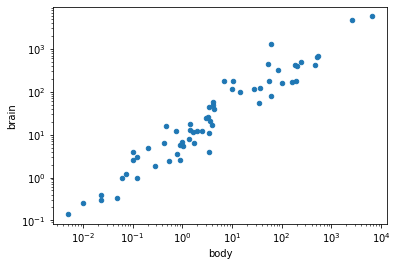

In [17]:
mammals.plot.scatter(x='body', y='brain', loglog=True);

### Fit and Plot a Linear Regression on Your Data

Transformed, the data presents an elegant linear relationship; just looking at the scatterplot, the line practically draws itself. But how tight is that linear relationship? Put another way, how far away from the line of best fit are the points of your dataset on average from the line of best fit? Fit and plot a simple linear regression model for the data to find out. 

1. Split your dataset into predictor variable (`X` is a common name of this variable) and the respons variable (`y` is a common variable name for this). (Remember to transform your data at this stage in the same way that you transformed it when you plotted it.)
2. Further divide your into training and test subsets. (There is a Scikit-learn function for this.)
3. Create the linear regression model object.
4. Fit the model to the training data.

**Note:** You will get an error when you try to fit the data. Refer to https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_numpy.html and to https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.reshape.html for documenation on how to reshape the your data.

In [18]:
# You will need to reshape and transform your data in order to fit your model.
X = np.log(mammals['body']).to_numpy().reshape(-1,1)
y = np.log(mammals['brain'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

Now plot your model with your data. Run [`matplotlib.pyplot.plot`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html) along with your transformed scatter plot of the data to do so. (Using a different color for the model will help you see it more clearly.)

**Group or Partner Discussion**

 - Does your model plot as you expected it to? Does your linear model show up as a line? Remember that are modeling log-transformed data; what complementary transformations do you need to run on it to produce the linear plot you expect?
    - *If students are stuck, you can explain that, becuase they have transformed their $X$ and $y$ values by taking their logarithms, they must plot the predictors and predicitons values as exponents in order to produce a straight line (as shown in the code cell below).*

**Note:** Python has functions that can perform the necessary transformations and the dataset is small enough that you will likely not notice a lag in performance by using the native Python functions. That said, it is a good habit to develop to use the NumPy ufuncs for when you deal with larger datasets. For a reminder on these, refer to the Reactors moduls on NumPy.

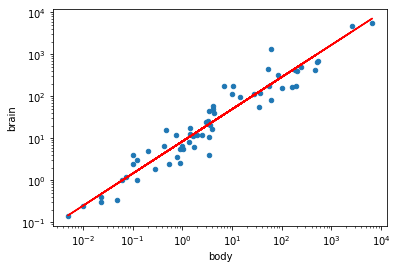

In [19]:
# Remember to account for the transformation of your data when you plot your model.
mammals.plot.scatter(x='body', y='brain', logx=True, logy=True);
plt.plot(np.exp(X), np.exp(reg.predict(X)), color='red');

If your transformations were successful, you should see a gratifyingly tight line with your points of data closely clustered about it. But looks can be subjective. How good is relation in reality? Us the [$R^2$ score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) to find out.

In [20]:
r2_score(y_test, reg.predict(X_test))

0.8757444044097347

## Section 2: Intermediate Exploration

As your investigation showed, there is a profound relationship between the size of mammals and the size of their brains: your $R^2$ score indicates that almost 88% of the proportional, average weight of a mammal's brain can be explained by its body weight alone. (The task of evolutionary biologists is to then examine what accounts for the other 12% of the variance.) A good model, to be sure, but in practice, how good is 'good'? Plot the linear model against the untransformed data to see this more clearly.

To create this plot, you will again use the Pandas `plot` (or `plot.scatter`) method in conjunction with `matplotlib.pyplot.plot`. However, you will need to create Numpy array to supply inputs along the x-axis for `matplotlib.pyplot.plot`. (See the Reactors Numpy module for a refresher on how to do that.) You will also need to transform that array when you input it to you model and further transform the output of your model to plot it accurately.

**Group or Partner Discussion**

 - What errors are you getting? Do you need to reshape any of the data? Are zero values causing trouble for any of your transformations? How should you best deal with those?
    - *Students will likely encounter this error when they attempt this visualization: `ValueError: Expected 2D array, got 1D array instead`. In order to avoid this, they will need to use the `reshape(-1,1)` method as shown in the code cell below.*

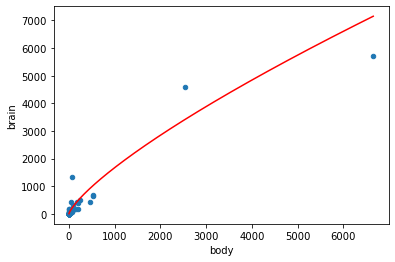

In [21]:
# Remember in plotting this that your model was fitted using transformed data.
mammals.plot.scatter(x='body', y='brain')
x_array = np.arange(1, max(mammals['body']))
plt.plot(x_array, np.exp(reg.predict(np.log(x_array).reshape(-1,1))), color='red');

Even with a good model, the noise inherent in real data can means that experimental values still diverge from your predicted ones by more than 20% in some cases. For this reason, it can be valuable to remember the maxim of statistician George Box that "[all models are wrong, but some are useful](https://en.wikipedia.org/wiki/All_models_are_wrong)."

**Note:** Another way to approach this challenge is to deal with the model coefficient and intercept directly. Recall that linear models take the form of `Y`$ = $`intercept`$ + $`coefficient`$ * $`x`. Check the documentation for your model object to see how to access those values in your model.

In [7]:
print(reg.coef_, reg.intercept_)

[0.76632949] 2.12893055330856


### When Linear Regression is Less Helpful

As you develop your data-science skills, it is natural to want to apply the new tools that you learn to use on a variety of problems. Thus when learning about new algorithms, it can sometimes be as valuable to learn about when not to apply them as when to use them.

For example, consider a case where linear regression might not provide the insight that you would like. To investigate this, import and plot the `lynx.csv` dataset, which contains annual numbers of lynx trappings for 1821–1934 in the Mackenzie River area of Canada. (Source: Campbell, M. J. and Walker, A. M. (1977). A Survey of statistical work on the Mackenzie River series of annual Canadian lynx trappings for the years 1821–1934 and a new analysis. *Journal of the Royal Statistical Society series A, 140*, 411–431. doi: [10.2307/2345277](http://doi.org/10.2307/2345277).)

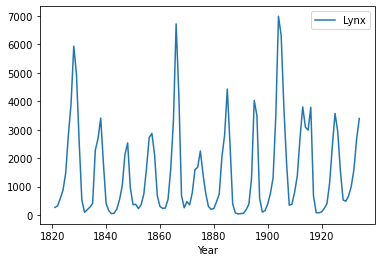

In [8]:
# Note: The plot of this data should produce a cyclical pattern.
lynx = pd.read_csv('Data/lynx.csv')
lynx.plot(x="Year", y="Lynx");

Your plot should show and interesting cyclical pattern to the data. A high peak in lynx numbers is followed by three smaller peaks every 9-10 years and then the pattern repeats itself. Ample food supply enables Mackenzie River lynx to reproduce to high numbers, after which the population plummets due to lack of food. The food supply gradually builds back up, enabling a repeat of the boom-and-bust population growth of the lynx.

**Group or Partner Discussion**

 - Is a linear model appropriate for data like this? Why or why not? What do you suspect you might see if you attempt to fit a linear model to this data?
    - *To an extent, the answer to this question rest on defining what is appropriate. If the goal is to predict future lynx numbers, the following exercise will illustrate why a linear model is inappropriate for this task. If the goals is evaluate the overall trend in the lynx population, a linear model can be appropriate.*

Go ahead and fit and plot this data as you did for the mammals dataset above.

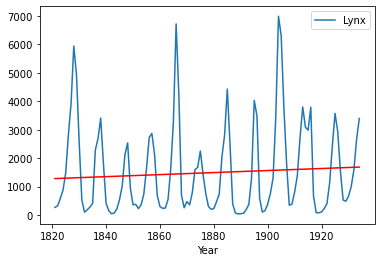

In [9]:
# Remember to reshape your data in order to fit the regression model.
X = lynx['Year'].to_numpy().reshape(-1,1)
y = lynx['Lynx']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LinearRegression()
lr.fit(X_train,y_train)
lynx.plot(x="Year", y="Lynx")
plt.plot(X, lr.predict(X), color='red');

Now check the $R^2$ score for this model.

In [10]:
r2_score(y_test, reg.predict(X_test))

-0.01761515526500057

**Group or Partner Discussion**

 - What does this $R^2$ score mean? What interpretation might it carry? (This [essay](https://web.maths.unsw.edu.au/~adelle/Garvan/Assays/GoodnessOfFit.html) from the University of New South Wales might help your discussion.)
    - *The $R^2$ score quantifies the proportion of variance explained by a model. For this reason, a model that just predicted the mean value of the training set regardless of the input would a have an $R^2$ score of zero: it encapsulates none of the variance in the linear relationship being modeled.*
    - *In the example above, the negative $R^2$ score means that the model does a worse job than just predicting the mean value. In other words, while the linear model does show an up trend in the number of lynx, year-to-year it does a worse job of predicting how many lynx there will be than just predicting the yearly average.*
 - Even if your $R^2$ score cannot explain the proportion of variance explained by your model, what information might it nonetheless provide?
    - *Even though the linear model is actually worse at prediction than just drawing a horizontal line at the mean, the slope of the model gives an indication of a rising trend in the lynx population.* 

### Classification

Some practitioners say that 70% of problems in data science involve classificaiton. This figure is probably higher still in life sciences. In order to explore ML-based classification, let's return to a dataset you already encountered in the Reactors Manipulating and Cleaning Data module. Import the Python scikit-learn library and use an iconic dataset that every data scientist has seen hundreds of times: British biologist Ronald Fisher's *Iris* data set used in his 1936 paper "The use of multiple measurements in taxonomic problems."

You have already imported the Scikit-learn library containing the `iris` dataset; you can access it using the `load_iris()` function. (Look at the `?load_iris` documentation for more information about this function; the data and target information is stored separately.) You might also find it helpful to create a DataFrame with the iris information in order to investigate it. (Check the Reactors Pandas module for a refresher on how to load data into DataFrames.)

In [11]:
iris = load_iris()
X = iris.data
y = iris.target
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

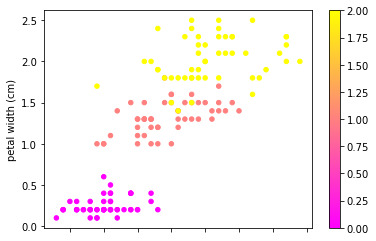

In [12]:
iris_df.plot(kind='scatter', x='sepal length (cm)', y='petal width (cm)', c=y, cmap=('spring'))

In the Reactors Machine Learning module, you used the logistic regression and decision tree algorithms to classify observations into two categories, but there are many other kinds of classification algorithms that you will explore in this module.

#### $K$-means Clustering

$K$-means clustering is an example of unsupervised machine learning. Rather than having to train a model, the $k$-means algorithm examines all of the data to make a determination of which category to assign a particular observation. All that you have to do is supply the algorithm with the number of categories into which you want observations classified.

Based on the number of species in the `iris` dataset, what is the most appropriate number of clusters to submit to the algorithm? Fit a $k$-means model for that number of clusters and measure its accuracy. (Consult the ?metrics.accuracy_score documentation for information on how to do this.)

In [14]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans = kmeans.fit(X)
y_pred = kmeans.predict(X)
metrics.accuracy_score(y, y_pred)

0.09333333333333334

**Group or Partner Discussion**

 - Is this accuracy surprising? Try different values for the `random_state` parameter in the `KMeans` function (such as 0, 1, 2). Why the large disparities in accuracy based on the random state of the algorithm? (In the Individual Exploration section below, you can explore some of the structure of the `iris` dataset that can help generate these disparities.)
    - *The $k$-means algorithm can converge on different centroids the clusters depending on the initial centroid seeds. The disparities in accuracy for different `random_state` parameters reflects that some clusters are more accurate than others for classification.*

#### $K$-nearest Neighbors

A classification algorithm that might work better on the `iris` dataset is the $k$-nearest neighbors algorithm (abbreviated $k$-NN). It works by comparing an observation to its $k$ nearest training observations in feature space (where $k$ is a parameter supplied by the user). $k$-NN is a supervised algorithm, so it does need to be supplied with a *response*--the correct classifications that you are looking for (often referred to as $y$)--in order to classify new observations. Fit a $k$-NN model and use `metrics.accuracy_score` to examine its accuracy.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9736842105263158

**Group or Partner Discussion**

 - Try supplying different `random_state` parameters to the `train_test_split` function (such as `random_state=0` and `random_state=2`). What causes the differences in accuracy?
    - *The `random_state` parameter determines on which subset of data points will be used to train the $k$-NN model. Some students might quickly grasp that the $k$-NN algorithm does not necessarily need a fitting step: it can consider the entirety of the data set to classify data points. This is true but can be enormously expensive computationally speaking. For this reason, actual implementations of $k$-NN ofter use data structures such as [$k$-d trees](https://en.wikipedia.org/wiki/K-d_tree) and [ball trees](https://en.wikipedia.org/wiki/Ball_tree) to speed up classification; these data structures can be fitted once and used again, which is what happens with the `fit` method.*
    - *Interested students or groups can also refer to this post on Stack Exchange for more information: https://stats.stackexchange.com/questions/349842/why-do-we-need-to-fit-a-k-nearest-neighbors-classifier*

One way to mitigate the luck of the draw inherent in training/test splitting is to do so repeatedly. Testing your models in this way is called cross validation (or $k$-fold cross validation after the number of times you resplit the data, the folds). Scikit-learn has a [good page](https://scikit-learn.org/stable/modules/cross_validation.html) in its documentation on the concept.

Use the `cross_val_score` model to perform a 10-fold cross validation on your $k$-NN model and take the mean of the accuracy scores.

In [16]:
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
scores.mean()

0.9666666666666668

## Section 3: Individual Exploration

Here are some ideas to continue your exploration of classification and predictive ML algorithms:

- What number of nearest neighbors provides the highest average accuracy for your $k$-NN model? While it's true that with the $k$-NN algorithm you don't have to worry about feature engineering or selection, the selection of $k$ can play a big role in the algorithm's accuracy for you dataset and must be tuned. The better that you can tune your algorithm for accuracy, the better you can help domain experts solve problems, be they correctly identifying irises (in this example) or sequencing genes in bioinformatics or correctly identifying diseased cells in a medical application.

(Hint: Try referring back to the Reactors Python module for a refresher on loops and data structures to see how you could automate this comparison over many several different values of $k$.)

In [17]:
k_range = list(range(1, 26))
k_dict = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_dict[k] = scores.mean()
score_max = max(k_dict, key=k_dict.get) 
print(score_max, k_dict[score_max])

13 0.9800000000000001


 - Visualize the `iris` dataset to see why the $k$-means algorithm produced the accuracy that it did.
 
 The `iris` dataset has four features, which means that a true scatter plot of all of the observations in it would require four dimensions, which is impossible to visualize directly. However, you can use a technique called principle component analysis (PCA) to reduce this to three dimensions with minimal loss of information.
 
 To visualized a "flattened" `iris` dataset, you will need to fit a PCA transformation with the data from the dataset. You can get some ideas about what code to use from this [page](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) from the Scikit-learn documentation.

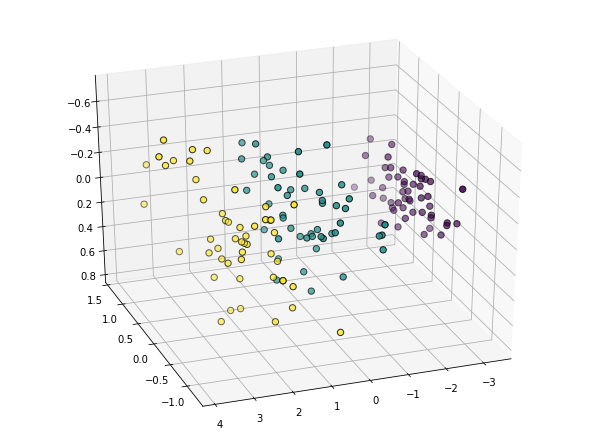

In [18]:
# Perform the PCA dimension-reduction on the iris data.
X_reduced = PCA(n_components=3).fit_transform(iris.data)

# Create the 3D plot of the "flattened" iris data set.
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap='viridis', edgecolor='k', s=40)

With this visualization in hand, why might $k$-means clustering not be a good classification algorithm to use with the `iris` dataset? (This [Wikipedia article](https://en.wikipedia.org/wiki/K-means_clustering) on $k$-means clustering might help your discussion.)
 - *In this lower-dimensional projection of the data, the three types of iris appear in parallel bands, which also play a role with the $k$-means algorithm being able to cleanly draw boundaries between them in higher dimensions.*